In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data_scientist_intern_revenue_model.csv').iloc[:,:-1]
df.replace(',','', regex=True, inplace=True)
df.replace(' -   ', np.nan, regex=True, inplace=True)

variable_names = df.columns
variable_names.values[1] = variable_names.values[1].strip()
df[variable_names[1:]] = df[variable_names[1:]].astype(float)
print(variable_names)

df

Index(['NAME', 'Revenue_2015', 'Revenue_2016', 'Revenue_2017', 'Revenue_2018',
       'Revenue_2019', 'Employees_2017', 'Employees_2018', 'Employees_2019',
       'Employees_2020'],
      dtype='object')


,NAME,Revenue_2015,Revenue_2016,Revenue_2017,Revenue_2018,Revenue_2019,Employees_2017,Employees_2018,Employees_2019,Employees_2020
0,LAKI,1.903978e+10,2.467163e+10,2.457376e+10,2.260886e+10,2.657454e+10,NaN,805.0,790.0,785.0
1,YETS,3.687564e+09,3.663588e+09,3.420430e+09,3.265963e+09,3.465058e+09,NaN,2394.0,2494.0,2548.0
2,PNMD,3.139300e+09,3.214000e+09,3.196900e+09,3.193700e+09,3.166000e+09,6411.0,6506.0,7750.0,NaN
3,VKNF,1.994112e+09,2.023348e+09,1.982028e+09,2.007387e+09,2.009031e+09,NaN,1925.0,1995.0,2050.0
4,HHVD,7.612489e+08,1.121284e+09,1.245810e+09,1.317865e+09,1.779402e+09,NaN,5159.0,5599.0,5483.0
...,...,...,...,...,...,...,...,...,...,...
17419,ECYY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,99.0
17420,GCGH,NaN,NaN,NaN,NaN,NaN,NaN,171.0,175.0,165.0
17421,HCRP,7.793100e+04,5.968600e+04,2.830900e+04,1.306000e+03,NaN,NaN,NaN,NaN,12.0
17422,JXDE,3.068900e+04,6.182000e+03,1.429000e+03,NaN,NaN,NaN,NaN,NaN,7.0


In [3]:
data_with_negative_value_index = list(df[df['Revenue_2015']<0]['NAME'].values)

data_with_negative_value_index = data_with_negative_value_index + list(df[df['Revenue_2016']<0]['NAME'].values) + list(df[df['Revenue_2017']<0]['NAME'].values) + list(df[df['Revenue_2018']<0]['NAME'].values) + list(df[df['Revenue_2019']<0]['NAME'].values) + list(df[df['Employees_2017']<0]['NAME'].values) + list(df[df['Employees_2018']<0]['NAME'].values) + list(df[df['Employees_2019']<0]['NAME'].values) + list(df[df['Employees_2020']<0]['NAME'].values)

df = df.set_index('NAME')
df = df.drop(data_with_negative_value_index)
print((df['Revenue_2015'] < 0).sum())
print((df['Revenue_2016'] < 0).sum())
print((df['Revenue_2017'] < 0).sum())
print((df['Revenue_2018'] < 0).sum())
print((df['Revenue_2019'] < 0).sum())
print((df['Employees_2020'] < 0).sum())
print((df['Employees_2019'] < 0).sum())
print((df['Employees_2018'] < 0).sum())
print((df['Employees_2017'] < 0).sum())

0
0
0
0
0
0
0
0
0


In [4]:
df = df.reset_index()
company_list = df.NAME.values
revenue_data = df[['NAME', 'Revenue_2015', 'Revenue_2016', 'Revenue_2017', 'Revenue_2018', 'Revenue_2019']]

In [5]:
revenue_data = revenue_data.dropna(thresh=3, axis=0)
company_list = revenue_data.index.values
duplicated_name = company_list[np.where(revenue_data.index.duplicated())]

In [6]:
df = df.loc[revenue_data.index, :]
df = df.drop_duplicates(subset=['NAME'])
company_list = df.NAME.values

In [7]:
df.NAME.duplicated().sum()

0

In [8]:
df

,NAME,Revenue_2015,Revenue_2016,Revenue_2017,Revenue_2018,Revenue_2019,Employees_2017,Employees_2018,Employees_2019,Employees_2020
0,LAKI,1.903978e+10,2.467163e+10,2.457376e+10,2.260886e+10,2.657454e+10,NaN,805.0,790.0,785.0
1,YETS,3.687564e+09,3.663588e+09,3.420430e+09,3.265963e+09,3.465058e+09,NaN,2394.0,2494.0,2548.0
2,PNMD,3.139300e+09,3.214000e+09,3.196900e+09,3.193700e+09,3.166000e+09,6411.0,6506.0,7750.0,NaN
3,VKNF,1.994112e+09,2.023348e+09,1.982028e+09,2.007387e+09,2.009031e+09,NaN,1925.0,1995.0,2050.0
4,HHVD,7.612489e+08,1.121284e+09,1.245810e+09,1.317865e+09,1.779402e+09,NaN,5159.0,5599.0,5483.0
...,...,...,...,...,...,...,...,...,...,...
17344,ITSA,1.073050e+05,1.373860e+05,NaN,NaN,NaN,NaN,NaN,1.0,NaN
17345,VLNW,2.111605e+06,2.954778e+06,NaN,NaN,NaN,NaN,42.0,42.0,43.0
17356,DHHC,4.276300e+04,3.454400e+04,NaN,NaN,NaN,347.0,351.0,290.0,312.0
17384,HCRP,7.793100e+04,5.968600e+04,2.830900e+04,1.306000e+03,NaN,NaN,NaN,NaN,12.0


In [9]:
revenue_data = df[['NAME', 'Revenue_2015', 'Revenue_2016', 'Revenue_2017', 'Revenue_2018', 'Revenue_2019']].set_index('NAME')
ts_revenue_data = revenue_data.T
employee_data = df[['NAME', 'Employees_2017', 'Employees_2018', 'Employees_2019', 'Employees_2020']].set_index('NAME')
ts_employee_data = employee_data.T

In [10]:
ts_revenue_data

NAME,LAKI,YETS,PNMD,VKNF,HHVD,OWRH,DQVE,SMBV,LLQC,XXEK,...,RKBL,NYJT,ZDNQ,GWHB,OQQY,ITSA,VLNW,DHHC,HCRP,JXDE
Revenue_2015,1.903978e+10,3.687564e+09,3.139300e+09,1.994112e+09,7.612489e+08,1.542347e+09,1.198734e+09,1.423357e+09,1.462664e+09,1.592032e+09,...,NaN,NaN,16.0,14367.0,30274.0,107305.0,2111605.0,42763.0,77931.0,30689.0
Revenue_2016,2.467163e+10,3.663588e+09,3.214000e+09,2.023348e+09,1.121284e+09,1.432739e+09,1.377446e+09,1.455164e+09,1.343274e+09,1.585729e+09,...,30000.0,23250.0,1.0,NaN,34767.0,137386.0,2954778.0,34544.0,59686.0,6182.0
Revenue_2017,2.457376e+10,3.420430e+09,3.196900e+09,1.982028e+09,1.245810e+09,1.684765e+09,1.461826e+09,1.406572e+09,1.487356e+09,1.476923e+09,...,17365.0,3158.0,NaN,12782.0,23008.0,NaN,NaN,NaN,28309.0,1429.0
Revenue_2018,2.260886e+10,3.265963e+09,3.193700e+09,2.007387e+09,1.317865e+09,1.878176e+09,1.657819e+09,1.534896e+09,1.562650e+09,1.451335e+09,...,35538.0,NaN,NaN,NaN,7158.0,NaN,NaN,NaN,1306.0,NaN
Revenue_2019,2.657454e+10,3.465058e+09,3.166000e+09,2.009031e+09,1.779402e+09,1.756473e+09,1.663037e+09,1.667789e+09,1.575028e+09,1.513090e+09,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
ts_employee_data

NAME,LAKI,YETS,PNMD,VKNF,HHVD,OWRH,DQVE,SMBV,LLQC,XXEK,...,RKBL,NYJT,ZDNQ,GWHB,OQQY,ITSA,VLNW,DHHC,HCRP,JXDE
Employees_2017,NaN,NaN,6411.0,NaN,NaN,NaN,NaN,197.0,3492.0,389.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,347.0,NaN,NaN
Employees_2018,805.0,2394.0,6506.0,1925.0,5159.0,319.0,3405.0,203.0,3748.0,425.0,...,NaN,NaN,NaN,NaN,NaN,NaN,42.0,351.0,NaN,NaN
Employees_2019,790.0,2494.0,7750.0,1995.0,5599.0,343.0,3377.0,209.0,3845.0,442.0,...,1.0,3.0,3.0,4.0,1.0,1.0,42.0,290.0,NaN,NaN
Employees_2020,785.0,2548.0,NaN,2050.0,5483.0,335.0,3096.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,43.0,312.0,12.0,7.0


In [12]:
ts_employee_data

NAME,LAKI,YETS,PNMD,VKNF,HHVD,OWRH,DQVE,SMBV,LLQC,XXEK,...,RKBL,NYJT,ZDNQ,GWHB,OQQY,ITSA,VLNW,DHHC,HCRP,JXDE
Employees_2017,NaN,NaN,6411.0,NaN,NaN,NaN,NaN,197.0,3492.0,389.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,347.0,NaN,NaN
Employees_2018,805.0,2394.0,6506.0,1925.0,5159.0,319.0,3405.0,203.0,3748.0,425.0,...,NaN,NaN,NaN,NaN,NaN,NaN,42.0,351.0,NaN,NaN
Employees_2019,790.0,2494.0,7750.0,1995.0,5599.0,343.0,3377.0,209.0,3845.0,442.0,...,1.0,3.0,3.0,4.0,1.0,1.0,42.0,290.0,NaN,NaN
Employees_2020,785.0,2548.0,NaN,2050.0,5483.0,335.0,3096.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,43.0,312.0,12.0,7.0


In [13]:
employee_data

,Employees_2017,Employees_2018,Employees_2019,Employees_2020
NAME,,,,
LAKI,NaN,805.0,790.0,785.0
YETS,NaN,2394.0,2494.0,2548.0
PNMD,6411.0,6506.0,7750.0,NaN
VKNF,NaN,1925.0,1995.0,2050.0
HHVD,NaN,5159.0,5599.0,5483.0
...,...,...,...,...
ITSA,NaN,NaN,1.0,NaN
VLNW,NaN,42.0,42.0,43.0
DHHC,347.0,351.0,290.0,312.0


In [14]:
df

,NAME,Revenue_2015,Revenue_2016,Revenue_2017,Revenue_2018,Revenue_2019,Employees_2017,Employees_2018,Employees_2019,Employees_2020
0,LAKI,1.903978e+10,2.467163e+10,2.457376e+10,2.260886e+10,2.657454e+10,NaN,805.0,790.0,785.0
1,YETS,3.687564e+09,3.663588e+09,3.420430e+09,3.265963e+09,3.465058e+09,NaN,2394.0,2494.0,2548.0
2,PNMD,3.139300e+09,3.214000e+09,3.196900e+09,3.193700e+09,3.166000e+09,6411.0,6506.0,7750.0,NaN
3,VKNF,1.994112e+09,2.023348e+09,1.982028e+09,2.007387e+09,2.009031e+09,NaN,1925.0,1995.0,2050.0
4,HHVD,7.612489e+08,1.121284e+09,1.245810e+09,1.317865e+09,1.779402e+09,NaN,5159.0,5599.0,5483.0
...,...,...,...,...,...,...,...,...,...,...
17344,ITSA,1.073050e+05,1.373860e+05,NaN,NaN,NaN,NaN,NaN,1.0,NaN
17345,VLNW,2.111605e+06,2.954778e+06,NaN,NaN,NaN,NaN,42.0,42.0,43.0
17356,DHHC,4.276300e+04,3.454400e+04,NaN,NaN,NaN,347.0,351.0,290.0,312.0
17384,HCRP,7.793100e+04,5.968600e+04,2.830900e+04,1.306000e+03,NaN,NaN,NaN,NaN,12.0


In [15]:
def make_missing_pie_chart(series):
    
    size = [series.isna().sum(), series.count()]
    return plt.pie(size, labels =['Missing Data', 'Non-missing'])

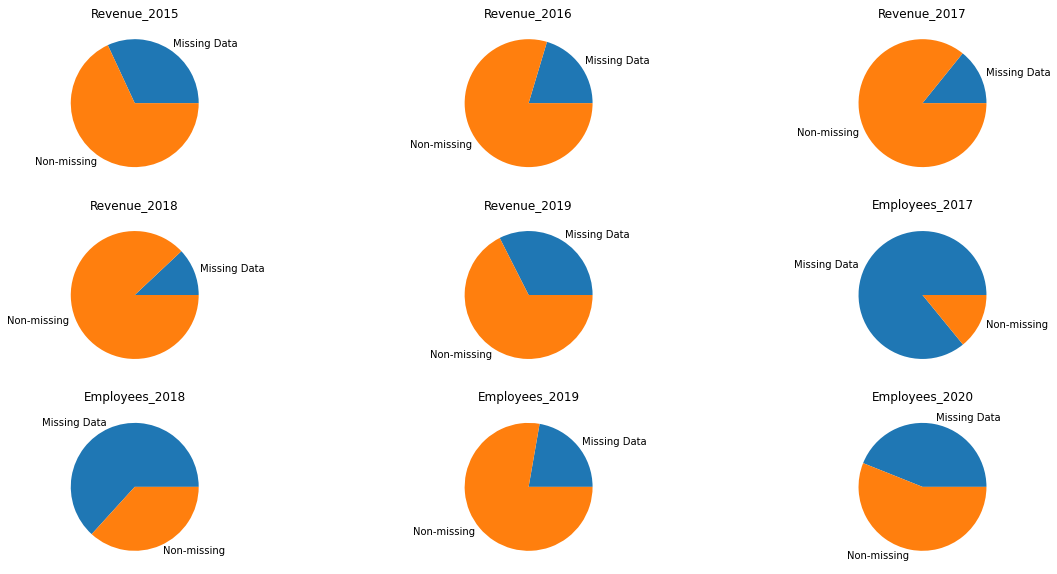

In [16]:
fig = plt.figure(figsize=(20,10))
for i in range(1, len(df.columns)):
    plt.subplot(3,3,i)
    make_missing_pie_chart(df[df.columns[i]])
    plt.title(df.columns[i])

In [17]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=2)
imputated_employee_data = pd.DataFrame(imputer.fit_transform(employee_data.values), 
                                       index=employee_data.index, columns=employee_data.columns)

In [18]:
imputated_employee_data = round(imputated_employee_data)
imputated_employee_data

,Employees_2017,Employees_2018,Employees_2019,Employees_2020
NAME,,,,
LAKI,787.0,805.0,790.0,785.0
YETS,2328.0,2394.0,2494.0,2548.0
PNMD,6411.0,6506.0,7750.0,7562.0
VKNF,1850.0,1925.0,1995.0,2050.0
HHVD,5340.0,5159.0,5599.0,5483.0
...,...,...,...,...
ITSA,16.0,2.0,1.0,4.0
VLNW,24.0,42.0,42.0,43.0
DHHC,347.0,351.0,290.0,312.0


In [19]:
temp_df = pd.merge(revenue_data, imputated_employee_data, left_index=True, right_index=True)

In [20]:
print((temp_df['Revenue_2015'] < 0).sum())
print((temp_df['Revenue_2016'] < 0).sum())
print((temp_df['Revenue_2017'] < 0).sum())
print((temp_df['Revenue_2018'] < 0).sum())
print((temp_df['Revenue_2019'] < 0).sum())
print((temp_df['Employees_2020'] < 0).sum())
print((temp_df['Employees_2019'] < 0).sum())
print((temp_df['Employees_2018'] < 0).sum())
print((temp_df['Employees_2017'] < 0).sum())
temp_df

0
0
0
0
0
0
0
0
0


,Revenue_2015,Revenue_2016,Revenue_2017,Revenue_2018,Revenue_2019,Employees_2017,Employees_2018,Employees_2019,Employees_2020
NAME,,,,,,,,,
LAKI,1.903978e+10,2.467163e+10,2.457376e+10,2.260886e+10,2.657454e+10,787.0,805.0,790.0,785.0
YETS,3.687564e+09,3.663588e+09,3.420430e+09,3.265963e+09,3.465058e+09,2328.0,2394.0,2494.0,2548.0
PNMD,3.139300e+09,3.214000e+09,3.196900e+09,3.193700e+09,3.166000e+09,6411.0,6506.0,7750.0,7562.0
VKNF,1.994112e+09,2.023348e+09,1.982028e+09,2.007387e+09,2.009031e+09,1850.0,1925.0,1995.0,2050.0
HHVD,7.612489e+08,1.121284e+09,1.245810e+09,1.317865e+09,1.779402e+09,5340.0,5159.0,5599.0,5483.0
...,...,...,...,...,...,...,...,...,...
ITSA,1.073050e+05,1.373860e+05,NaN,NaN,NaN,16.0,2.0,1.0,4.0
VLNW,2.111605e+06,2.954778e+06,NaN,NaN,NaN,24.0,42.0,42.0,43.0
DHHC,4.276300e+04,3.454400e+04,NaN,NaN,NaN,347.0,351.0,290.0,312.0


In [21]:
for i in range(len(revenue_data)):
    revenue_data.iloc[i, :].fillna(revenue_data.iloc[i, :].mean(), inplace=True)

In [22]:
temp_df1 = pd.merge(revenue_data, imputated_employee_data, left_index=True, right_index=True)

In [23]:
print((temp_df1['Revenue_2015'] < 0).sum())
print((temp_df1['Revenue_2016'] < 0).sum())
print((temp_df1['Revenue_2017'] < 0).sum())
print((temp_df1['Revenue_2018'] < 0).sum())
print((temp_df1['Revenue_2019'] < 0).sum())
print((temp_df1['Employees_2020'] < 0).sum())
print((temp_df1['Employees_2019'] < 0).sum())
print((temp_df1['Employees_2018'] < 0).sum())
print((temp_df1['Employees_2017'] < 0).sum())
temp_df1

0
0
0
0
0
0
0
0
0


,Revenue_2015,Revenue_2016,Revenue_2017,Revenue_2018,Revenue_2019,Employees_2017,Employees_2018,Employees_2019,Employees_2020
NAME,,,,,,,,,
LAKI,1.903978e+10,2.467163e+10,2.457376e+10,2.260886e+10,2.657454e+10,787.0,805.0,790.0,785.0
YETS,3.687564e+09,3.663588e+09,3.420430e+09,3.265963e+09,3.465058e+09,2328.0,2394.0,2494.0,2548.0
PNMD,3.139300e+09,3.214000e+09,3.196900e+09,3.193700e+09,3.166000e+09,6411.0,6506.0,7750.0,7562.0
VKNF,1.994112e+09,2.023348e+09,1.982028e+09,2.007387e+09,2.009031e+09,1850.0,1925.0,1995.0,2050.0
HHVD,7.612489e+08,1.121284e+09,1.245810e+09,1.317865e+09,1.779402e+09,5340.0,5159.0,5599.0,5483.0
...,...,...,...,...,...,...,...,...,...
ITSA,1.073050e+05,1.373860e+05,1.223455e+05,1.223455e+05,1.223455e+05,16.0,2.0,1.0,4.0
VLNW,2.111605e+06,2.954778e+06,2.533192e+06,2.533192e+06,2.533192e+06,24.0,42.0,42.0,43.0
DHHC,4.276300e+04,3.454400e+04,3.865350e+04,3.865350e+04,3.865350e+04,347.0,351.0,290.0,312.0


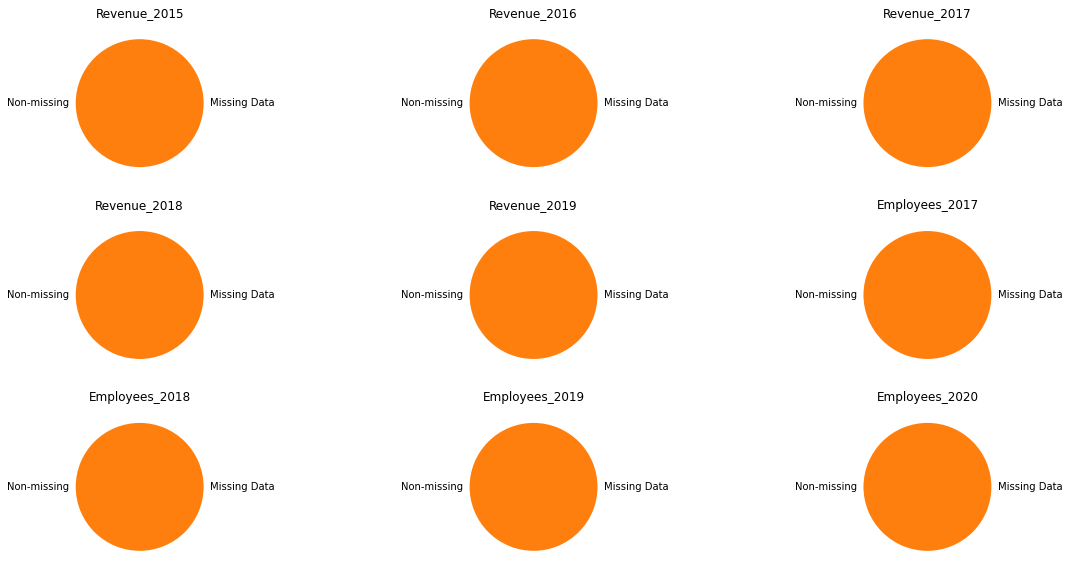

In [24]:
fig = plt.figure(figsize=(20,10))
for i in range(0, len(temp_df1.columns)):
    plt.subplot(3,3,i+1)
    make_missing_pie_chart(temp_df1[temp_df1.columns[i]])
    plt.title(temp_df1.columns[i])

In [25]:
temp_df1.to_csv('Imputated Data.csv')

$$
Revenue_{t} = \beta_1 MovingAverage_1 + \beta_2 MovingAverage_2 + \beta_3 Employee_{t} + e_t
$$

In [1]:
from sklearn.linear_model import LinearRegression
import pandas as pd
from sklearn.model_selection import train_test_split
from FeatureSelections import *
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

In [2]:
final_df = pd.read_csv('Imputated Data.csv')
final_df

,NAME,Revenue_2015,Revenue_2016,Revenue_2017,Revenue_2018,Revenue_2019,Employees_2017,Employees_2018,Employees_2019,Employees_2020,3_year_moving_average_1,3_year_moving_average_2,3_year_moving_average_3,Revenue_2020
0,LAKI,1.903978e+10,2.467163e+10,2.457376e+10,2.260886e+10,2.657454e+10,787,805,790,785,2.276173e+10,2.395142e+10,2.458572e+10,2.951875e+10
1,YETS,3.687564e+09,3.663588e+09,3.420430e+09,3.265963e+09,3.465058e+09,2328,2394,2494,2548,3.590527e+09,3.449994e+09,3.383817e+09,4.158322e+09
2,PNMD,3.139300e+09,3.214000e+09,3.196900e+09,3.193700e+09,3.166000e+09,6411,6506,7750,7562,3.183400e+09,3.201533e+09,3.185533e+09,3.891188e+09
3,VKNF,1.994112e+09,2.023348e+09,1.982028e+09,2.007387e+09,2.009031e+09,1850,1925,1995,2050,1.999829e+09,2.004254e+09,1.999482e+09,2.436749e+09
4,HHVD,7.612489e+08,1.121284e+09,1.245810e+09,1.317865e+09,1.779402e+09,5340,5159,5599,5483,1.042781e+09,1.228320e+09,1.447692e+09,1.632408e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13684,ITSA,1.073050e+05,1.373860e+05,1.223455e+05,1.223455e+05,1.223455e+05,16,2,1,4,1.223455e+05,1.273590e+05,1.223455e+05,1.554924e+05
13685,VLNW,2.111605e+06,2.954778e+06,2.533192e+06,2.533192e+06,2.533192e+06,24,42,42,43,2.533192e+06,2.673720e+06,2.533192e+06,3.205665e+06
13686,DHHC,4.276300e+04,3.454400e+04,3.865350e+04,3.865350e+04,3.865350e+04,347,351,290,312,3.865350e+04,3.728367e+04,3.865350e+04,3.296099e+05
13687,HCRP,7.793100e+04,5.968600e+04,2.830900e+04,1.306000e+03,4.180800e+04,36,36,10,12,5.530867e+04,2.976700e+04,2.380767e+04,4.348273e+04


In [3]:
final_df = pd.read_csv('Imputated Data.csv').set_index('NAME')

final_df['3_year_moving_average_1'] = (final_df['Revenue_2015'] + final_df['Revenue_2016'] + final_df['Revenue_2017']) / 3
final_df['3_year_moving_average_2'] = (final_df['Revenue_2016'] + final_df['Revenue_2017'] + final_df['Revenue_2018']) / 3
final_df['3_year_moving_average_3'] = (final_df['Revenue_2017'] + final_df['Revenue_2018'] + final_df['Revenue_2019']) / 3

X = final_df[['3_year_moving_average_1', '3_year_moving_average_1', 'Employees_2019']]
y = final_df['Revenue_2019']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [29]:
print(OLS_feature_CV(X_train, y_train, X_test, y_test))

Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


-----
Best parameters {'fit_intercept': False}
Mean cross-validated accuracy score of the best_estimator: -9387534.840
-----
{'Best parameters': {'fit_intercept': False}, 'Mean squared error': 4541128559279133.0, 'Coefficient of determination': 0.9328681000262333, 'RMSLE': 0.8822356730021496}


[Parallel(n_jobs=-1)]: Done   8 out of  20 | elapsed:    1.4s remaining:    2.1s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    1.4s finished


In [30]:
reg = LinearRegression(fit_intercept=False).fit(X, y)

X_Forecast = final_df[['3_year_moving_average_2', '3_year_moving_average_3', 'Employees_2020']]

Revenue_2020_ols = reg.predict(X_Forecast)

final_df['Revenue_2020'] = Revenue_2020_ols
final_df.to_csv('regression_prediction.csv')
print(Revenue_2020_ols)

[2.95187532e+10 4.15832207e+09 3.89118788e+09 ... 3.29609932e+05
 4.34827277e+04 1.59556376e+04]


In [31]:
print(Ridge_feature_CV(X_train, y_train, X_test, y_test))

Fitting 10 folds for each of 600 candidates, totalling 6000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 696 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 2320 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 4584 tasks      | elapsed:    8.5s


-----
Best parameters {'alpha': 0.8367346938775527, 'fit_intercept': False, 'solver': 'saga'}
Mean cross-validated accuracy score of the best_estimator: -9224916.583
-----
{'Best parameters': {'alpha': 0.8367346938775527, 'fit_intercept': False, 'solver': 'saga'}, 'Mean squared error': 4538232373037889.0, 'Coefficient of determination': 0.9329109146003012, 'RMSLE': 0.8067644101126827}


[Parallel(n_jobs=-1)]: Done 6000 out of 6000 | elapsed:   11.0s finished


In [32]:
ridge_reg = Ridge(alpha=0.8367346938775527, fit_intercept=False, solver='saga').fit(X, y)

Revenue_2020_ridge = ridge_reg.predict(X_Forecast)

final_df = pd.read_csv('Imputated Data.csv').set_index('NAME')

final_df['Revenue_2020'] = Revenue_2020_ridge
final_df.to_csv('ridge_prediction.csv')

print(Revenue_2020_ridge)

[2.95033431e+10 4.15393813e+09 3.88238438e+09 ... 4.61584771e+04
 3.25654107e+04 9.59188759e+03]


In [4]:
print(random_forest_CV(X_train, y_train, X_test, y_test))

Fitting 10 folds for each of 36 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   22.7s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:  6.3min finished


-----
Best parameters {'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 400}
Mean cross-validated accuracy score of the best_estimator: -13804002.750
-----
{'Best parameter': {'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 400}, 'Mean squared error': 5115733543210273.0, 'Coefficient of determination': 0.9243736643815302, 'RMSLE': 0.956517855089605}


In [6]:
rf = RandomForestRegressor(bootstrap=True, n_estimators=400, max_depth=None, max_features='sqrt', min_samples_leaf=1, min_samples_split=2).fit(X, y)

X_Forecast = final_df[['3_year_moving_average_2', '3_year_moving_average_3', 'Employees_2020']]

Revenue_2020_rf = rf.predict(X_Forecast)

final_df = pd.read_csv('Imputated Data.csv').set_index('NAME')

final_df['Revenue_2020'] = Revenue_2020_rf
final_df.to_csv('rf_prediction.csv')

In [7]:
print(Revenue_2020_rf)

[1.76050296e+10 3.84773050e+09 4.66355880e+09 ... 1.37906254e+05
 1.00056120e+05 3.14339494e+04]
